In [4]:
!pip install geopandas
!pip install contextily
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import contextily as ctx
from sympy import true
from shapely.geometry import Point, Polygon
import csv
import math as math
import random
from matplotlib.cm import get_cmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fonction Utile

In [5]:
def distance(p, q):
    dist = 0
    for i in range(len(p)):
        dist+= (p[i]-q[i])**2
    return dist

def point_moyen(lst):
    x = 0
    y = 0
    for i in range(len(lst)):
        x+=lst[i][0]
        y+=lst[i][1]
    return [x/len(lst), y/len(lst)]

def csv_vers_tab(file):
    data = pd.read_csv(file)
    data = [[data["0"][i],data["1"][i]] for i in range(len(data["0"]))]
    return data

Donnée de test de la fonction CSV_Vers_Tab

In [6]:
data0 = csv_vers_tab("Données de tests-20220517/data0.csv")
data1 = csv_vers_tab("Données de tests-20220517/data1.csv")
data2 = csv_vers_tab("Données de tests-20220517/data2.csv")
data3 = csv_vers_tab("Données de tests-20220517/data3.csv")
data4 = csv_vers_tab("Données de tests-20220517/data4.csv")

# Application de la Méthode A

In [7]:
# paramètres : data : une matrice à m lignes et n colonnes où chaque ligne
# correspond à un point de Rn
# ListPtsInit : une liste de points pour initialiser l'algorithme
# NbMaxIter : un entier fixant le nombre maximal
# d'iteration de la boucle principale
# ListOfClasses : une liste de classes (listes de points)
# ListOfCentroids : la liste des points moyens de chaque classe
def MethodA(data, ListPtsInit, NbMaxIter):
    ListOfCentroids = [ListPtsInit[i] for i in range(len(ListPtsInit))]
    for i in range(1, NbMaxIter):
        ListOfClasses = [[ListOfCentroids[i]] for i in range(len(ListOfCentroids))]
        for p in range(len(data)):
            min = 0
            for k in range(1, len(ListOfCentroids)):
                if distance(data[p], ListOfCentroids[k]) < distance(data[p], ListOfCentroids[min]):
                    min = k   
            ListOfClasses[min].append(data[p])
        for k in range(1, len(ListOfCentroids)):
            if len(ListOfClasses[k]) != 0 :
                ListOfCentroids[k] = point_moyen(ListOfClasses[k])
            else :
                ListOfCentroids[k] = data[random.randint(0, len(data))]
    return ListOfClasses, ListOfCentroids


In [52]:
# Titre : chaine de caracteres
# sauvegarde une illustration graphique de la MethodA dans un fichier Title.pdf
def MethodAExample(Title : str):
    _, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    ax1.set_title("Données brutes")
    ax2.set_title("Application de l'algorithme")
    data = data0
    ListPtsInit = [data[random.randint(0, len(data))] for i in range(4)]
    x, y = MethodA(data, ListPtsInit, 50)
    ax1.scatter([i[0] for i in data], [i[1] for i in data], color = "blue")
    for i in x:
            ax2.scatter([j[0] for j in i], [j[1] for j in i])
    plt.savefig(str(Title) + ".pdf")

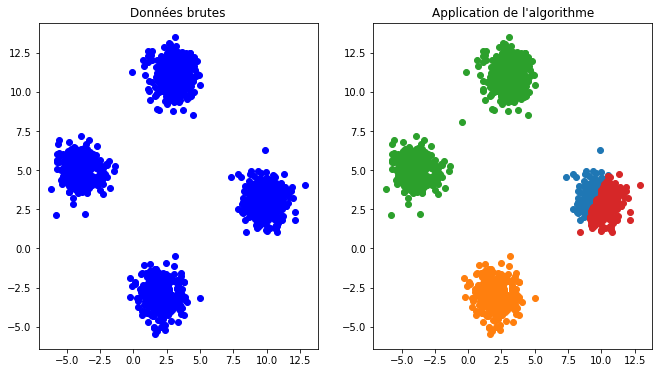

In [53]:
MethodAExample("MethodeA")

In [42]:
# data : une matrice à m lignes et n colonnes à chaque ligne
# correspond à un point de Rn
# NbClassMax : un entier égal au nombre de classes maximal
# Title : chaîne de caractères
# Sauvegarde une illustration sous le nom Title.pdf
def MethodAElbow(data, NbClassMax, Title):
    _, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    ax1.set_title("Données brutes")
    ax2.set_title("Inertie en fonction du nombre de partitions")
    tabCoude = []
    for k in range(1, NbClassMax):
        ListPtsInit = [data[random.randint(0, len(data))] for i in range(k)]
        x, y = MethodA(data, ListPtsInit, 50)
        intertieTotale = 0
        for i in range(len(x)) :
            inertieIntermediaire = 0
            for j in range(len(x[i])):
                inertieIntermediaire += distance(x[i][j], y[i])
            intertieTotale += inertieIntermediaire
        tabCoude.append(intertieTotale)
    ax1.scatter([i[0] for i in data], [i[1] for i in data], color = "blue")
    ax2.plot([i for i in range(1,NbClassMax)], tabCoude)
    plt.xlabel("Nb de classes")
    plt.ylabel("inertie")
    plt.savefig(str(Title) + ".pdf")

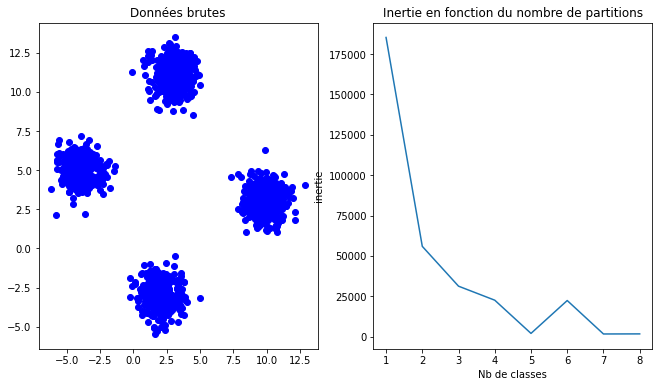

In [43]:
MethodAElbow(data0, 9, "MethodeAElbow")

In [12]:
# data : une matrice à m lignes et n colonnes où chaque ligne
# correspond à un point de Rn
# T : un entier fixant le nombre maximal d'itération
# de la boucle principale
# L : la liste de points intiaux que l'on va retourner
def initPoints(data, T):
    data_ut = list(data)
    L = []
    mFixe = point_moyen(data_ut)
    while len(data_ut)>T:
        max = 0
        for i in range(1, len(data_ut)):
            if distance(data_ut[i], mFixe) > distance(data_ut[max], mFixe):
                max = i
        mTemp = data_ut[max]
        deltaTemp = []
        for i in range(len(data_ut)): 
            if distance(data_ut[i], mTemp)<=distance(data_ut[i], mFixe):
                deltaTemp.append(data_ut[i])
                mTemp = 0
                for i in range(len(deltaTemp)):
                    mTemp = point_moyen(deltaTemp)
        if len(deltaTemp)>T:
            L.append(mTemp)
        for i in range(len(deltaTemp)):
            data_ut.remove(deltaTemp[i])
    return L

In [13]:
print(initPoints(data0, 20))

[[9.971823496953494, 3.074213124956946], [2.0347338500278425, -2.9941913491229886], [2.991725114331682, 11.015233491238224], [-3.9778723358200945, 5.012508935133683]]


In [14]:
# data : une matrice à m lignes et n colonnes où chaque ligne
# correspond à un point de Rn
# NbMaxIter : un entier fixant le nombre maximal d'itération
# de la boucle principale
# ListOfClasses : une liste de classes (listes de points)
# ListOfCentroids : la liste des points moyens de chaque classe
def MethodAIntel(data, NbMaxIter):
    ListPtsInit = initPoints(data, NbMaxIter)
    ListOfClasses, ListOfCentroids = MethodA(data, ListPtsInit, NbMaxIter)
    return ListOfClasses, ListOfCentroids

In [54]:
# Title : chaîne de caractères
# Sauvegarde une illustration graphique de MethodAIntel dans
# un fichier Title.pdf
def MethodAIntelExample(Title : str):
    _, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    ax1.set_title("Données brutes")
    ax2.set_title("Application de l'algorithme")
    data = data0
    x, y = MethodAIntel(data, 100)
    ax1.scatter([i[0] for i in data], [i[1] for i in data], color = "blue")
    for i in x:
        ax2.scatter([j[0] for j in i], [j[1] for j in i])
    plt.savefig(str(Title) + ".pdf")
    plt.show()

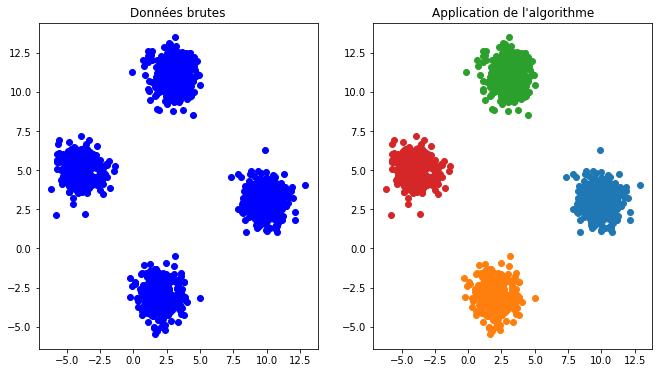

In [55]:
MethodAIntelExample("MethodeAIntel")

# Application de la méthode B

In [17]:
# Renvoie les points de S qui sont à une distance inférieure à epsilon de Pt
def Voisinage(data,Pt,epsilon) :
    retour = []
    for i in range(len(data)):
        if abs(distance([Pt[0], Pt[1]], [data[i][0], data[i][1]])) < epsilon:
            retour.append(data[i])
    return retour

def ExtensionClasse(S,point,ptsVois,C,epsilon,Nmin) :
    point[3] = C
    for p in ptsVois :
        if p[2] == False :
            p[2] = True
            ptsVoisPrime = Voisinage(S,p,epsilon)
            if len(ptsVoisPrime) >= Nmin : 
                ptsVois.extend(ptsVoisPrime)
        elif p[3] == -1 :
            p[3] = C

In [18]:
# data : une matrice à m lignes et n colonnes
# epsilon : un flottant
# Nmin : un entier positif
# ListOfMarkedPts : la liste des points marqués avec leur
# num´ero de classe. Un élément de ListOfMarkerPts est
# [p1,...,pn,True,C] avec [p1,...pn] est un element de data
# et C correspond à son numéro de classe
def MethodB(data, epsilon, Nmin):
    data = pd.read_csv(data)
    ListOfMarkedPts  = [[data["0"][i],data["1"][i], False,-1] for i in range(len(data["0"]))]   
    sBruit = []
    C = -1
    for i in range(len(ListOfMarkedPts)) :
        if ListOfMarkedPts[i][2] == False :
            ListOfMarkedPts[i][2] = True

            ptsVois = Voisinage(ListOfMarkedPts, ListOfMarkedPts[i], epsilon)
            if len(ptsVois) < Nmin : sBruit.append(ListOfMarkedPts[i])
            else : 
                C+=1
                ExtensionClasse(ListOfMarkedPts, ListOfMarkedPts[i], ptsVois, C, epsilon, Nmin)
    return ListOfMarkedPts

In [19]:
print(MethodB("Données de tests-20220517/data1.csv", 0.3, 3))

[[-2.4709102724007206, -1.6868048733244638, True, 0], [2.4797576676235598, -0.4622824377419342, True, 1], [0.3558451662505472, 4.988713913312724, True, 1], [1.507353918618676, 3.8542322065948738, True, 1], [5.097431979587171, 0.7527232660380485, True, 0], [-0.1423358117953453, 4.852919043597327, True, 1], [5.256953320445024, 1.6112258679721745, True, 0], [3.991246169370144, -2.486265348902254, True, 0], [-0.6963610418521704, 4.856424923718754, True, 1], [0.2530431225298026, -1.2154876448236902, True, 1], [2.3938929409721137, -3.91567650309559, True, 0], [-4.128863879924004, 1.4572432528313732, True, 2], [-3.684718429362019, 2.0256910985622065, True, 2], [1.222453494574305, 4.845310770153758, True, 1], [-5.356411807993516, -4.946217516173023, True, 1], [-0.8796445994925906, 1.045351926544022, True, 0], [-6.29803073464918, 0.1319249374021678, True, 1], [-5.580212602844727, -3.983266607398285, True, 1], [0.6750236186535673, -5.9430496831369775, True, 2], [-4.498674308654852, -2.6988034683

In [56]:
# Title : chaîne de caractères
# Sauvegarde une illustration graphique de MethodB dans un
# fichier Title.pdf
def MethodBExample(Title):
    dataName = "Données de tests-20220517/data1.csv"
    _, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    ax1.set_title("Données brutes")
    ax2.set_title("Application de l'algorithme")
    data = pd.read_csv(dataName)
    data = [[data["0"][i],data["1"][i]] for i in range(len(data["0"]))]
    x = MethodB(dataName, 0.3, 3)
    # print(x)

    tabcolor = ["blue", "green", "red", "orange"]
    ax1.scatter([i[0] for i in data], [i[1] for i in data], color = "blue")
    for i in range(len(x)):
        ax2.scatter(x[i][0], x[i][1],color=tabcolor[x[i][3]%4])
            
    plt.savefig(str(Title) + ".pdf")

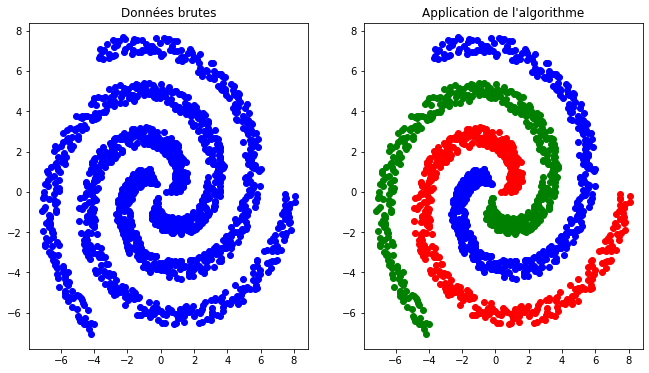

In [57]:
MethodBExample("MethodeB")

# MethodeAIntel avec nbMaxIter = 50 pour data0
# MethodeB avec epsilon = 0.3 pour data1
# MethodeB avec epsilon = 0.4 pour data2
# MethodeAintel avec nbMaxIter = 50 pour data3
# MethodeB avec epsilon = 0.01 pour data4

In [22]:
def tabStrToFloat(tab_str) :
    tab = []
    for i in range(len(tab_str)) : tab.append(float(tab_str[i]))
    return tab

In [25]:
def create_CSV(tab) :
  with open('dataLocationXY.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["", "0", "1"])
    for i in range(len(tab)) : 
      writer.writerow([i, tab[i][1], tab[i][0]])

In [71]:
def viewLocationsLA_nonFiltre():
    ### Lecture du fichier
    data = gpd.read_file('1a-dep2021.json')
    data = data.to_crs(epsg=4326)

    ### Code départemental de Loire-Atlantique
    filter_dep = ["44"]
    ### On filtre nos données
    data = data.query('dep in @filter_dep')

    data2 = gpd.read_file("793866443_hebergements-locatifs-meubles-chambre-hotes-en-loire-atlantique.csv")   
    listLat = tabStrToFloat(list(data2["Latitude"]))
    listLong = tabStrToFloat(list(data2["Longitude"]))
    coords = [[[listLat[i], listLong[i]] for i in range(len(data2["Latitude"]))]]
    create_CSV(coords[0])
    x = MethodB("dataLocationXY.csv", 0.001, 5)
    ### Ouverture d'une figure
    fig, axes = plt.subplots(1,1,figsize=(12,12))
    
    ### Tracé des données géographiques dans la figure
    data.plot(
        ax = axes, # Axes de tracé
        linewidth=0.1, # Epaisseur de la ligne
        edgecolor='black', # Couleur de la ligne
        alpha = 0 # Transparence de l'aplat
    )
    name = "Accent"
    cmap = get_cmap(name)
    colors = cmap.colors
    axes.set_prop_cycle(color=colors)
    for i in range(len(x)):
        plt.scatter(x[i][0], x[i][1],color=colors[x[i][3]%len(colors)])
    axes.set_axis_off() # Suppression des axes
    ### Affichage
    ctx.add_basemap(ax=axes, crs=data.crs)
    plt.savefig("vueDonneesLocationsLANonFiltrees")

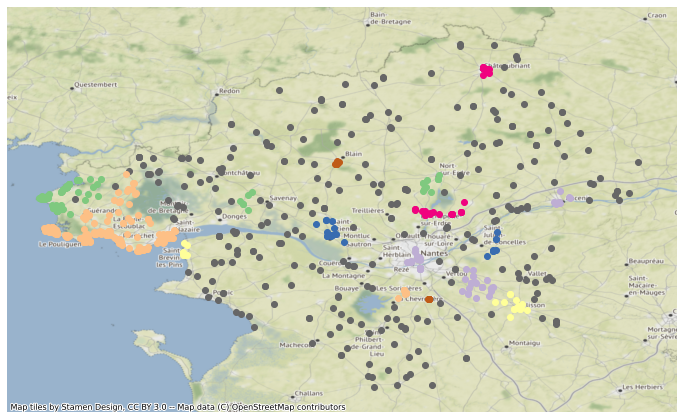

In [72]:
viewLocationsLA_nonFiltre()

In [69]:
def viewLocationsLA_Final():
    ### Lecture du fichier
    data = gpd.read_file('1a-dep2021.json')
    data = data.to_crs(epsg=4326)

    ### Code départemental de Loire-Atlantique
    filter_dep = ["44"]
    ### On filtre nos données
    data = data.query('dep in @filter_dep')

    data2 = gpd.read_file("793866443_hebergements-locatifs-meubles-chambre-hotes-en-loire-atlantique.csv")   
    listLat = tabStrToFloat(list(data2["Latitude"]))
    listLong = tabStrToFloat(list(data2["Longitude"]))
    coords = [[[listLat[i], listLong[i]] for i in range(len(data2["Latitude"]))]]
    create_CSV(coords[0])
    x = MethodB("dataLocationXY.csv", 0.001, 5)
    ### Ouverture d'une figure
    fig, axes = plt.subplots(1,1,figsize=(12,12))
    
    ### Tracé des données géographiques dans la figure
    data.plot(
        ax = axes, # Axes de tracé
        linewidth=0.1, # Epaisseur de la ligne
        edgecolor='black', # Couleur de la ligne
        alpha = 0 # Transparence de l'aplat
    )
    name = "Accent"
    cmap = get_cmap(name)
    colors = cmap.colors
    axes.set_prop_cycle(color=colors)
    for i in range(len(x)):
      if x[i][3]!=-1:
        plt.scatter(x[i][0], x[i][1],color=colors[x[i][3]%len(colors)])
    axes.set_axis_off() # Suppression des axes
    ### Affichage
    ctx.add_basemap(ax=axes, crs=data.crs)
    plt.savefig("vueDonneesLocationsLAFiltrees")

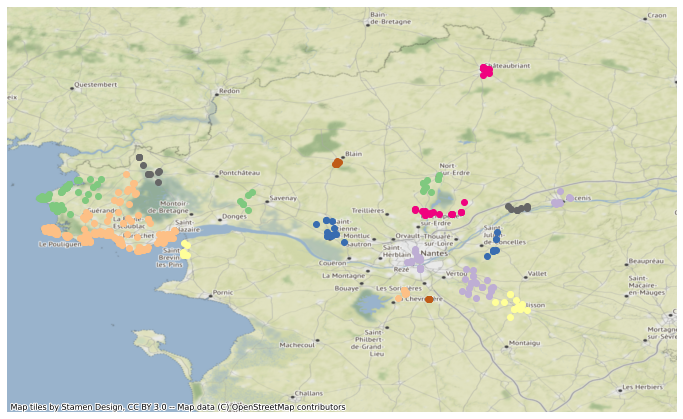

In [70]:
viewLocationsLA_Final()